In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [97]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
cancer = datasets.load_breast_cancer()

In [99]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [100]:
X = pd.DataFrame(data= cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
y = cancer.target

In [102]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [103]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [104]:
X.shape

(569, 30)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
X_train.shape

(455, 30)

In [107]:
X_test.shape

(114, 30)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [110]:
epochs= 50
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2, activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_9 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)             

In [112]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [113]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
15/15 [==============================] - 1s 29ms/step - loss: 0.6388 - accuracy: 0.7493 - val_loss: 0.3882 - val_accuracy: 0.9298
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1825 - accuracy: 0.9329 - val_loss: 0.3274 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0866 - accuracy: 0.9633 - val_loss: 0.2975 - val_accuracy: 0.9298
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0852 - accuracy: 0.9695 - val_loss: 0.2916 - val_accuracy: 0.9474
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1148 - accuracy: 0.9505 - val_loss: 0.2991 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1049 - accuracy: 0.9548 - val_loss: 0.2789 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0759 - accuracy: 0.9657 - val_loss: 0.2579 - val_accuracy: 0.9474
Epoch 8/50
15

In [114]:
def plot_learningCurve(history,epoch):
  #Plot training & Validation accuracy values

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range,r.history['accuracy'])
  plt.plot(epoch_range,r.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  #Plot training & Validation loss values

  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range,r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

In [115]:
r.history

{'accuracy': [0.8615384697914124,
  0.9362637400627136,
  0.9604395627975464,
  0.9670329689979553,
  0.9648351669311523,
  0.9560439586639404,
  0.9692307710647583,
  0.9714285731315613,
  0.9736263751983643,
  0.9780219793319702,
  0.9626373648643494,
  0.9802197813987732,
  0.9692307710647583,
  0.9824175834655762,
  0.9758241772651672,
  0.9824175834655762,
  0.9780219793319702,
  0.9758241772651672,
  0.9846153855323792,
  0.9824175834655762,
  0.9824175834655762,
  0.9824175834655762,
  0.9824175834655762,
  0.9846153855323792,
  0.9890109896659851,
  0.9758241772651672,
  0.9824175834655762,
  0.9780219793319702,
  0.9824175834655762,
  0.9802197813987732,
  0.9846153855323792,
  0.9824175834655762,
  0.9912087917327881,
  0.9780219793319702,
  0.9890109896659851,
  0.9890109896659851,
  0.9846153855323792,
  0.9780219793319702,
  0.9868131875991821,
  0.9934065937995911,
  0.9802197813987732,
  0.9846153855323792,
  0.9846153855323792,
  0.9780219793319702,
  0.9868131875991821

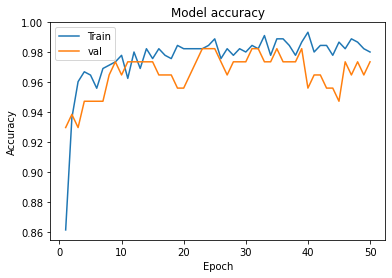

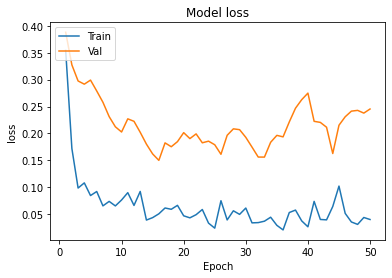

In [116]:
plot_learningCurve(r,epochs)

In [119]:
# Predictions

y_pred = model.predict(X_test)
print(y_pred)

[[2.2411114e-05]
 [8.8629818e-01]
 [9.9993235e-01]
 [9.9973750e-01]
 [9.9992913e-01]
 [9.9999475e-01]
 [1.0000000e+00]
 [9.9999690e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9917507e-01]
 [9.9214530e-01]
 [1.0000000e+00]
 [4.6777040e-02]
 [6.1961770e-01]
 [2.0509064e-03]
 [1.0000000e+00]
 [4.9578085e-11]
 [1.0890622e-09]
 [1.6844506e-21]
 [3.1654206e-05]
 [5.0268100e-05]
 [9.9997175e-01]
 [9.9996096e-01]
 [3.5259178e-05]
 [9.9999893e-01]
 [1.0000000e+00]
 [1.1205673e-03]
 [9.9987864e-01]
 [3.2028706e-11]
 [9.9999899e-01]
 [2.0376098e-10]
 [9.7731614e-01]
 [9.7121274e-06]
 [1.0000000e+00]
 [4.1813248e-05]
 [9.8683542e-01]
 [1.3770299e-08]
 [9.9905121e-01]
 [1.5780330e-04]
 [1.1847615e-02]
 [1.0000000e+00]
 [7.2470784e-02]
 [1.0000000e+00]
 [9.9990731e-01]
 [1.4265016e-22]
 [1.0000000e+00]
 [9.7445768e-01]
 [9.9999607e-01]
 [9.5896169e-08]
 [2.0467565e-09]
 [1.9410163e-02]
 [2.4073749e-10]
 [9.9999428e-01]
 [9.9999797e-01]
 [9.9999094e-01]
 [1.0000000e+00]
 [9.9999976e-01]
 [9.6882075e-0

In [120]:
9.15465236e-01

0.915465236

In [122]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.], dtype=float32)

In [123]:
#Function to get model accuracy

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9736842105263158


In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  1],
       [ 2, 65]])

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

